# 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
# Import numpy and pandas:
import pandas as pd
import numpy as np

# 1. Предобработка данных

В качестве датасетов будем использовать следующие: 1)набор данных о кошках 2) набор данных о собаках 3) возможно будет еще набор данных о обезьянах

In [119]:
cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv",dtype=np.float, header=None))
cats = cats.T

In [120]:
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", dtype=np.float, header=None))
dogs = dogs.T

In [121]:
print(cats.shape)
print(dogs.shape)

(80, 4096)
(80, 4096)


Это означает, что оба массива содержат по 80 изображений каждый (количество столбцов). Каждое изображение состоит из 64x64 пикселей (итого 4096 пикселей на изображение). Изображения были сведены так, что все 4096 находятся в одной строке.

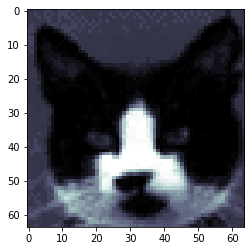

In [122]:
fig, ax = plt.subplots()
ax.imshow(cats[0,:].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest')

Далее создадим функцию стандартизации. Эта функция найдет среднее значение и стандартное отклонение для каждого изображения. Мы вычитаем среднее значение из каждого пикселя и делим каждый пиксель на стандартное отклонение.

In [71]:
from sklearn.preprocessing import StandardScaler
def standardize(x):
    return  StandardScaler().fit_transform(x)

In [196]:
Xm = np.mean(conc,axis=0)
Xs = np.std(conc,axis=0)
for i in range(160):
    conc[i,:] = (conc[i,:]-Xm)/(Xs)

In [125]:
conc

array([[ 1.62729443,  1.73140122,  1.72275667, ..., -0.13587854,
        -0.12814121, -0.12602345],
       [ 0.38158288,  0.33482835,  0.06509765, ..., -0.0777098 ,
         0.22258027,  0.22212766],
       [ 0.32800389,  0.50241709,  0.38281563, ...,  0.08225423,
        -0.06968763, -0.06799826],
       ...,
       [-0.56944422, -0.69863558, -0.50126918, ..., -0.06316762,
         0.1348999 , -0.06799826],
       [ 1.61389968,  1.73140122,  1.73657049, ...,  1.02749626,
         1.07015718,  0.99096135],
       [-0.02025956,  0.09741096,  0.0927253 , ...,  0.06771205,
        -0.25966176,  0.0625584 ]])

Теперь используйте функцию np.concatenate, чтобы объединить массивы кошек и собак. Используем axis = 1, чтобы правильно их объединить. Поставим собак на первое место.

In [123]:
conc = np.concatenate((dogs,cats,),axis=0)

# 2. Построение матрицы корреляций и составление списка признаков со слабой корреляцией

In [126]:
C = np.cov(conc.T,bias = True) # Determine NxN sized Cov. Matrix

print("Covariance matrix Dimensionality is: ",C.shape)
print("Covariance matrix is\n",C)

Covariance matrix Dimensionality is:  (4096, 4096)
Covariance matrix is
 [[1.         0.96293765 0.89397791 ... 0.20667445 0.216396   0.22003534]
 [0.96293765 1.         0.96546381 ... 0.19296505 0.20148196 0.19860027]
 [0.89397791 0.96546381 1.         ... 0.18452903 0.191088   0.17540085]
 ...
 [0.20667445 0.19296505 0.18452903 ... 1.         0.9812837  0.94195789]
 [0.216396   0.20148196 0.191088   ... 0.9812837  1.         0.9768517 ]
 [0.22003534 0.19860027 0.17540085 ... 0.94195789 0.9768517  1.        ]]


# 5. Реализация критериев выбора числа главных компонент (Кайзера, сломанной трости, каменистой осыпи)
# 4., 6. Определение числа главных компонент

Критерий Кайзера. Сначала отберем только факторы, с собственными значениями, большими 1. По существу, это означает, что если фактор не выделяет дисперсию, эквивалентную, по крайней мере, дисперсии одной переменной, то он опускается. Этот критерий предложен Кайзером (Kaiser, 1960), и является, вероятно, наиболее широко используемым. 

In [161]:
conc = np.concatenate((dogs,cats,),axis=0)
Xv = np.var(conc, axis = 0)
Xv=Xv[:]/4096
Xv = Xv.tolist()
Xv.sort(reverse = True)
count = 0
while (Xv[count]>1):
    count=count+1
count

2170

Таким образом по критерию Кайзера нам нужно взять 2170 факторов

Критерий каменистой осыпи. Критерий каменистой осыпи является графическим методом, впервые предложенным Кэттелем (Cattell, 1966). Нужно изобразить собственные значения, в виде простого графика. Кэттель предложил найти такое место на графике, где убывание собственных значений слева направо максимально замедляется. Предполагается, что справа от этой точки находится только "факториальная осыпь" - "осыпь" является геологическим термином, обозначающим обломки горных пород, скапливающиеся в нижней части скалистого склона. 

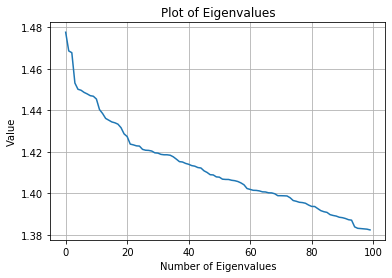

In [164]:
x=[]
y=[]
for i in range (100):
    x.append(i)
    y.append(Xv[i])
plt.figure()
plt.plot(x,y)
plt.title('Plot of Eigenvalues')
plt.xlabel('Number of Eigenvalues')
plt.ylabel('Value');
plt.grid()
plt.show()

Смотря на график, по критерию каменистой осыпи я бы оставил 96 факторов

Метод сломанной трости. Набор нормированных собственных чисел сравнивается с распределением длин обломков трости единичной длины, сломанной в n-1-й случайно выбранной точке (точки разлома выбираются независимо и равнораспределены по длине трости).

In [166]:
def run_pipeline(data, retain_method='broken_stick',
    rotation_method='varimax', **kwargs):

    # Set up the factor analysis object, indiate how to calculate the
    # correlation matrix out of this input data.

    fa = FactorAnalysis.load_data_samples(
        data,
        preproc_demean=True,
        preproc_scale=True
        )

    # Extract the components
    fa.extract_components()

    # Calculate how many components to retain
    # You can use any of these methods:
    #   'top_n', 'top_pct', 'kaiser', 'broken_stick'

    fa.find_comps_to_retain(
        method=retain_method,
        **kwargs
        )

    # Once you know how many to retain, re-extract with PAF
    fa.reextract_using_paf()

    # Apply factor rotation
    # Right now there are both 'varimax' and 'quartimax'
    fa.rotate_components(
        method=rotation_method
        )

    # Plot summary figure
    fig_summary = fa_plotting.graph_summary(fa)
    
    return fig_summary

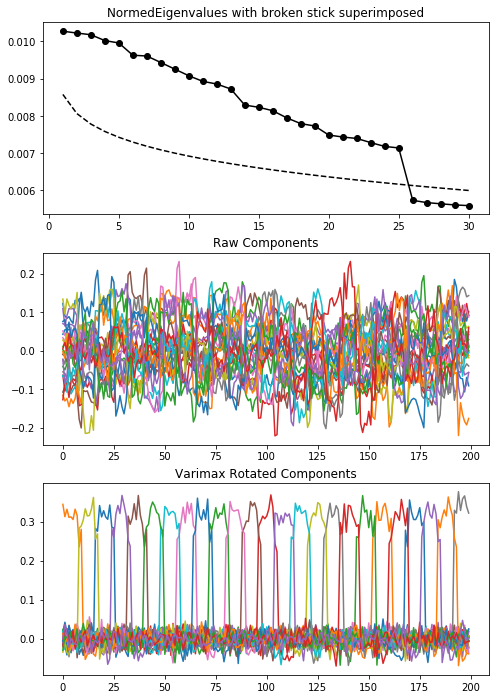

In [194]:
fig_bs = run_pipeline(conc, retain_method='broken_stick', rotation_method='varimax')

График % описываемой дисперсии в зависимости от количества главных компонент. (пометить на графике числа ГК по разным критериям)

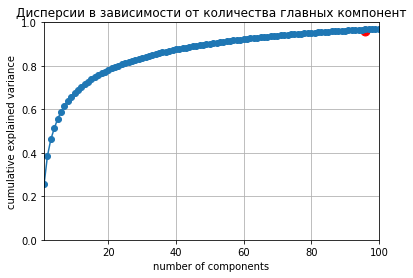

(160, 100)


Text(0.5, 0, 'Explained Variance')

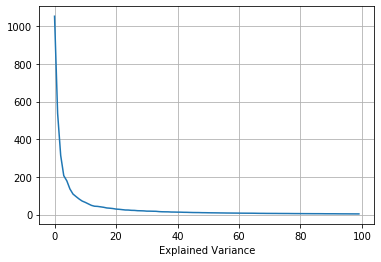

In [203]:
from sklearn.decomposition import PCA #import PCA
pca64 = PCA(n_components=100)
pca64.fit(conc) #training PCA
projected = pca64.transform(conc) #projecting the data onto Principal components
plt.figure()
plt.plot(np.arange(len(pca64.explained_variance_ratio_))+1,np.cumsum(pca64.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca64.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Дисперсии в зависимости от количества главных компонент')
plt.scatter(96, 0.96, color='red', s=80, marker='o')
plt.grid()
plt.show()

print(projected.shape)
plt.plot(pca64.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')

Из графика "Дисперсии в зависимости от количества главных компонент" видно что 64 фактора достаточно чтобы описать более 90% дисперсии